In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Pre-Processing


In [7]:
training_set=tf.keras.utils.image_dataset_from_directory(
    'D:\\Plant_Disease_Dataset\\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


## Validation Image Pre-Processing

In [8]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    'D:\\Plant_Disease_Dataset\\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [13]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

## To avoid overshooting

In [14]:
for x,y in training_set:
    print(x,x.shape) 
    print(y,y.shape) 
    break

tf.Tensor(
[[[[132.75 128.75 125.75]
   [135.25 131.25 128.25]
   [138.5  134.5  131.5 ]
   ...
   [116.5  111.5  108.5 ]
   [111.75 106.75 103.75]
   [110.   105.   102.  ]]

  [[139.75 135.75 132.75]
   [141.75 137.75 134.75]
   [142.5  138.5  135.5 ]
   ...
   [113.5  108.5  105.5 ]
   [111.75 106.75 103.75]
   [104.25  99.25  96.25]]

  [[135.   131.   128.  ]
   [140.   136.   133.  ]
   [142.5  138.5  135.5 ]
   ...
   [120.25 115.25 112.25]
   [109.25 104.25 101.25]
   [109.5  104.5  101.5 ]]

  ...

  [[172.25 172.25 174.25]
   [174.25 174.25 176.25]
   [171.   171.   173.  ]
   ...
   [141.75 139.75 140.75]
   [131.5  129.5  130.5 ]
   [135.   133.   134.  ]]

  [[180.   180.   182.  ]
   [178.25 178.25 180.25]
   [172.25 172.25 174.25]
   ...
   [143.25 141.25 142.25]
   [140.   138.   139.  ]
   [136.25 134.25 135.25]]

  [[176.75 176.75 178.75]
   [174.5  174.5  176.5 ]
   [173.75 173.75 175.75]
   ...
   [144.   142.   143.  ]
   [149.   147.   148.  ]
   [137.25 135.25 13

## Building Model

In [15]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential

In [16]:
model=Sequential()

## Building Convolutional layer 

In [18]:
model.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=5,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [19]:
model.add(Conv2D(filters=64,kernel_size=5,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=5,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [20]:
model.add(Conv2D(filters=128,kernel_size=5,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=5,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [21]:
model.add(Conv2D(filters=256,kernel_size=5,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=5,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [22]:
model.add(Conv2D(filters=512,kernel_size=5,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=5,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

## Flatting operation

In [23]:
model.add(Flatten())

In [24]:
model.add(Dense(units=1024,activation='relu'))

In [25]:
##output layer
model.add(Dense(units=38,activation='softmax'))

## Compiling Model

In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(
learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 32)          │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 64)          │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 256)           │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 256)           │       1,638,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 4, 4, 512)           │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 512)           │       6,554,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          38,950 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 15,250,854 (58.18 MB)

 Trainable params: 15,250,854 (58.18 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [28]:
# Define the batch size
batch_size = 32  # Example value, adjust as needed

# Calculate steps per epoch
steps_per_epoch = training_set.cardinality().numpy() // batch_size
validation_steps = validation_set.cardinality().numpy() // batch_size

# Fit the model
training_history = model.fit(
    x=training_set,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_set,
    epochs=25,
    validation_steps=validation_steps
)


Epoch 1/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.0281 - loss: 3.6824 - val_accuracy: 0.0496 - val_loss: 3.5630
Epoch 2/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.0482 - loss: 3.5731 - val_accuracy: 0.0827 - val_loss: 3.4104
Epoch 3/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.1040 - loss: 3.3138 - val_accuracy: 0.1471 - val_loss: 2.9999
Epoch 4/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.1647 - loss: 2.9478 - val_accuracy: 0.2224 - val_loss: 2.7190
Epoch 5/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.2105 - loss: 2.7422 - val_accuracy: 0.2849 - val_loss: 2.5027
Epoch 6/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.2811 - loss: 2.4876 - val_accuracy: 0.2996 - val_loss: 2.3923
Epoch 7/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.2993 - loss: 2.2908 - val_accuracy: 0.3787 - val_loss: 2.1094
Epoch 8/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.3804 - loss: 2.1041 - val_accuracy: 0.3676 - va

## Model Evaluation

In [29]:
##Model Evaluation on Training set
train_loss,train_acc=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1421s 647ms/step - accuracy: 0.7015 - loss: 0.9791


In [30]:
print(train_loss,train_acc)

0.9546626210212708 0.708471417427063


In [31]:
val_loss,val_acc=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 393s 715ms/step - accuracy: 0.6977 - loss: 1.0087


In [32]:
print(val_loss,val_acc)

1.0037976503372192 0.6961074471473694


## Saving Model

In [33]:
model.save("trained_model.keras")##can also save in h5 format but it took too much space 

In [34]:
training_history.history


{'accuracy': [0.02711397036910057,
  0.06571691483259201,
  0.11213235557079315,
  0.1764705926179886,
  0.22380514442920685,
  0.28722426295280457,
  0.3258272111415863,
  0.3704044222831726,
  0.4227941036224365,
  0.4329044222831726,
  0.49816176295280457,
  0.513786792755127,
  0.5353860259056091,
  0.5431985259056091,
  0.5629595518112183,
  0.6130514740943909,
  0.6139705777168274,
  0.638786792755127,
  0.6420036554336548,
  0.6645220518112183,
  0.689338207244873,
  0.6842830777168274,
  0.6847426295280457,
  0.7182904481887817,
  0.7192095518112183],
 'loss': [3.6433892250061035,
  3.5298879146575928,
  3.23649001121521,
  2.915527582168579,
  2.7033164501190186,
  2.453061103820801,
  2.2372872829437256,
  2.115882635116577,
  1.9361271858215332,
  1.909256935119629,
  1.7062015533447266,
  1.6408424377441406,
  1.5380498170852661,
  1.5105081796646118,
  1.4000647068023682,
  1.2922284603118896,
  1.2404141426086426,
  1.1788619756698608,
  1.1994954347610474,
  1.0750486850

In [30]:
##Recording history in json
import json as js
with open("training_history.json","w") as f:
    js.dump(training_history.history,f)


## Accuracy Visualization

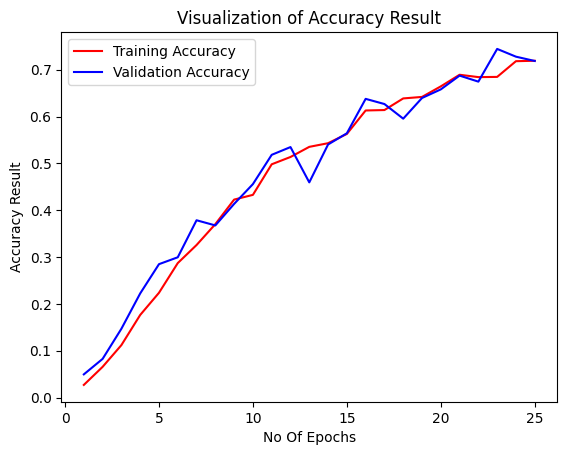

In [35]:
epochs=range (1,len(training_history.history['accuracy'])+1)
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No Of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Some Other Matrix For Model Evaluation

In [36]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [10]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'D:\\Plant_Disease_Dataset\\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [37]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 317s 576ms/step


(array([[7.62264371e-01, 6.51051328e-02, 4.89432598e-03, ...,
         8.33656377e-05, 3.09303490e-04, 4.57782997e-03],
        [2.10233450e-01, 6.13280535e-02, 8.88774055e-04, ...,
         1.10815861e-04, 4.75240631e-05, 7.23755802e-04],
        [8.73814225e-01, 1.03562306e-05, 3.66859080e-04, ...,
         1.05218817e-06, 2.48149763e-06, 1.21595010e-01],
        ...,
        [7.10963877e-06, 1.21224830e-09, 3.17717677e-05, ...,
         1.47611172e-05, 3.84116774e-08, 9.98556316e-01],
        [6.46812941e-06, 4.57462568e-10, 8.78929313e-06, ...,
         2.05930155e-05, 1.29871625e-08, 9.98876393e-01],
        [2.36436372e-05, 5.66139424e-05, 1.53749716e-05, ...,
         1.64860812e-05, 2.61649169e-04, 6.61120832e-01]], dtype=float32),
 (17572, 38))

In [38]:
predicted_categories=tf.argmax(y_pred,axis=1) ## if x=0 then row wise but we want to do it in column wise fashion

In [39]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  3,  0, ..., 37, 37, 37], dtype=int64)>

In [40]:
true_categories=tf.concat([y for x,y in test_set],axis=0) ##row-wise
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [41]:
Y_true=tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

## Classification Report

In [42]:
from sklearn.metrics import classification_report


In [43]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.51      0.66      0.58       504
                                 Apple___Black_rot       0.69      0.82      0.75       497
                          Apple___Cedar_apple_rust       0.72      0.70      0.71       440
                                   Apple___healthy       0.60      0.65      0.63       502
                               Blueberry___healthy       0.69      0.58      0.63       454
          Cherry_(including_sour)___Powdery_mildew       0.85      0.64      0.73       421
                 Cherry_(including_sour)___healthy       0.54      0.87      0.66       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.53      0.66       410
                       Corn_(maize)___Common_rust_       0.90      0.97      0.94       477
               Corn_(maize)___Northern_Leaf_Blight       0.72      0.96      0.

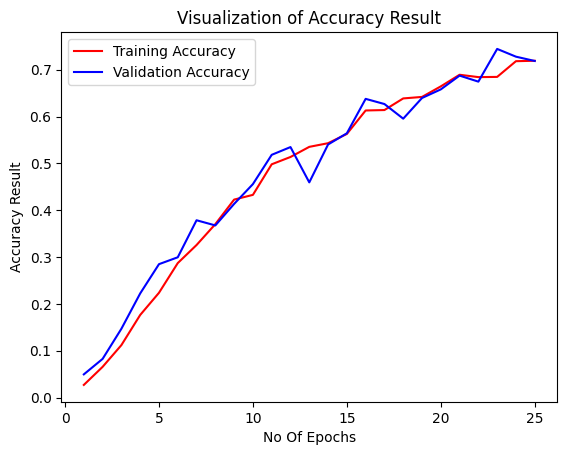

In [44]:
epochs=range (1,len(training_history.history['accuracy'])+1)
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No Of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Confusion Matrix:

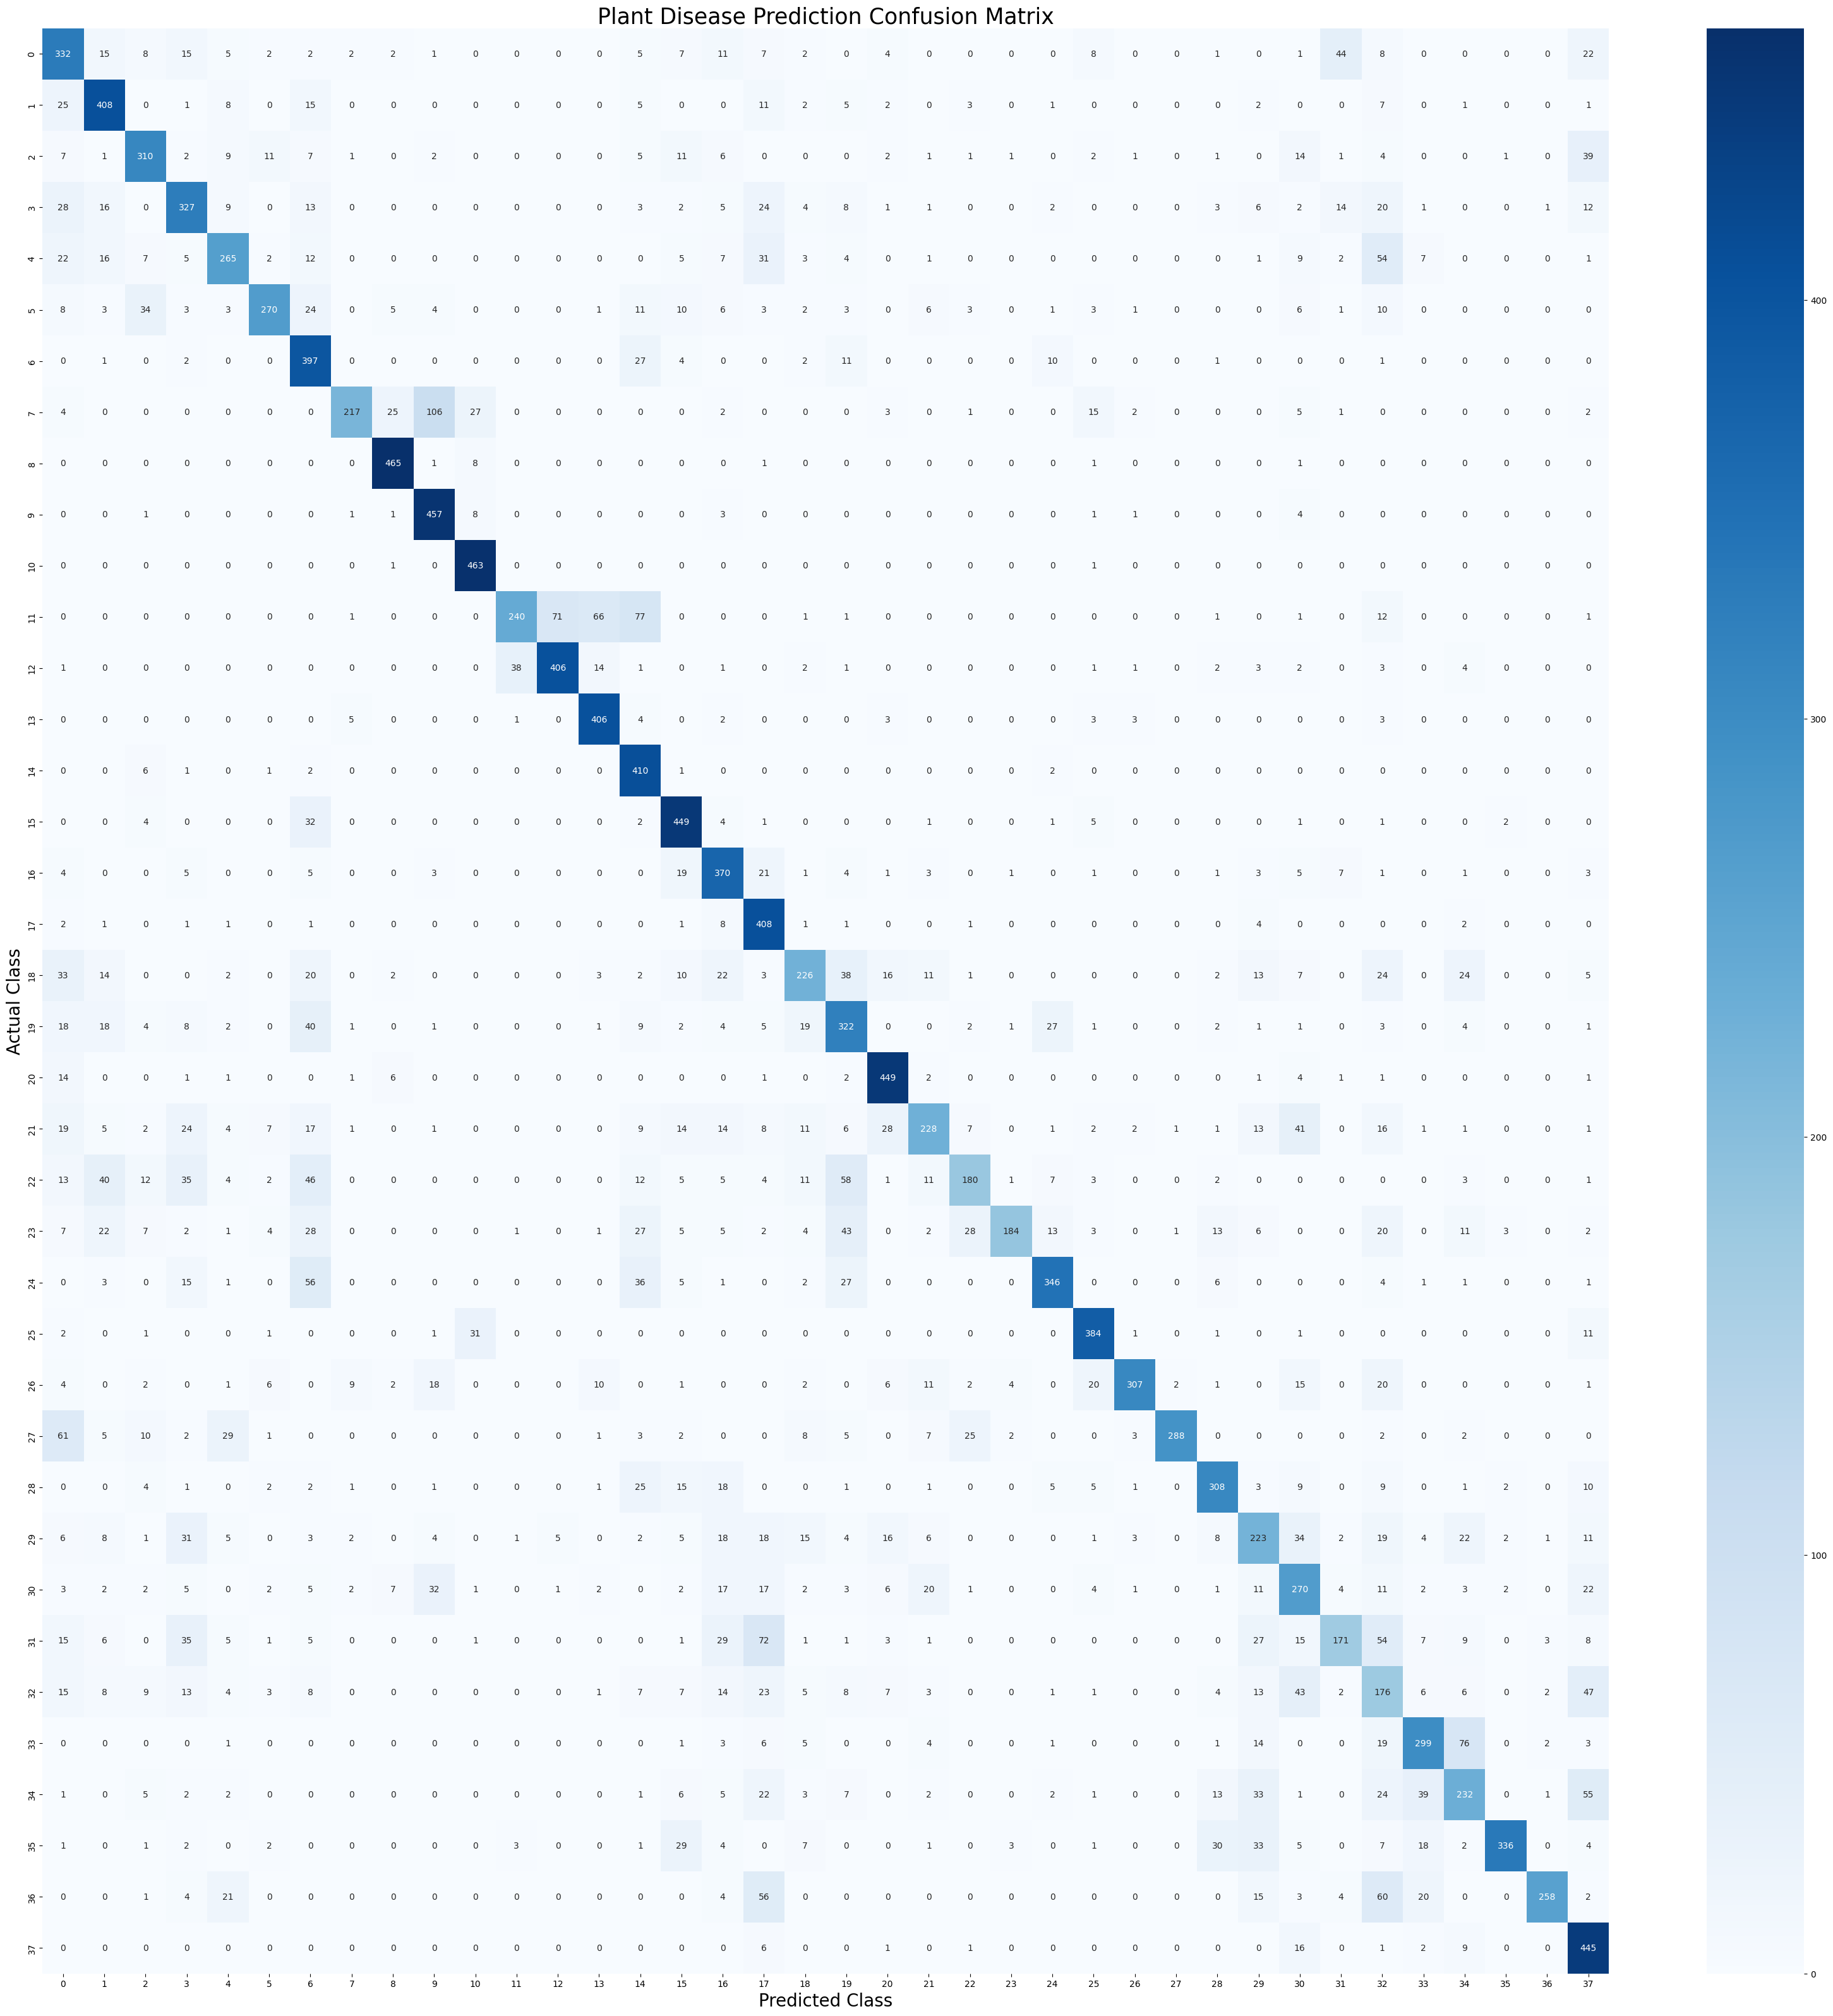

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(Y_true, predicted_categories)

# Plot the confusion matrix
plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, annot_kws={"size": 10}, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Class', fontsize=20)
plt.ylabel('Actual Class', fontsize=20)
plt.title('Plant Disease Prediction Confusion Matrix', fontsize=25)
plt.show()
